**Name - Arihant Gupta**
<br>
**Enrolment - E23CSEU0055**
<br>
**Batch - EB_02**
<br>
**Date - 21 Aug 2025**
<br>
**Lab - 07**
<br>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv("one.csv")
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [105]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [106]:
x = df[["acceleration"]]
y = df[["mpg"]].values

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [108]:
l_red = LinearRegression()
l_red.fit(x_train, y_train)
yl_pred = l_red.predict(x_test)

In [109]:
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x_train)
xt_poly2 = poly2.fit_transform(x_test)
pr2 = LinearRegression()
pr2.fit(x_poly2, y_train)
yp2_pred = pr2.predict(xt_poly2)

In [110]:
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x_train)
xt_poly3 = poly3.fit_transform(x_test)
pr3 = LinearRegression()
pr3.fit(x_poly3, y_train)
yp3_pred = pr3.predict(xt_poly3)

In [111]:
print("R-square Score")
print(f"R2 - Linear --> {r2_score(y_test, yl_pred)}")
print(f"R2 - Poly - Deg 2 --> {r2_score(y_test, yp2_pred)}")
print(f"R2 - Poly - Deg 3 --> {r2_score(y_test, yp3_pred)}")

R-square Score
R2 - Linear --> 0.24896699025159474
R2 - Poly - Deg 2 --> 0.26907910952470293
R2 - Poly - Deg 3 --> 0.26548073662507776


In [112]:
print("Mean Absolute Error")
print(f"MAE - Linear --> {mean_absolute_error(y_test, yl_pred)}")
print(f"MAE - Poly - Deg 2 --> {mean_absolute_error(y_test, yp2_pred)}")
print(f"MAE - Poly - Deg 3 --> {mean_absolute_error(y_test, yp3_pred)}")

Mean Absolute Error
MAE - Linear --> 5.5593364053684375
MAE - Poly - Deg 2 --> 5.392170767362945
MAE - Poly - Deg 3 --> 5.40583522784042


c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\ariha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


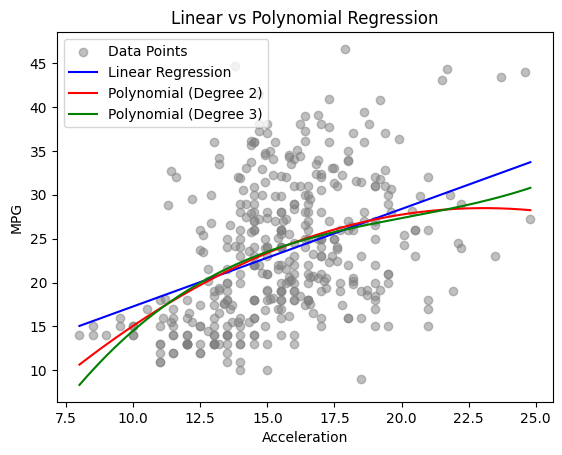

In [113]:
x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
y_lin_line = l_red.predict(x_range)
plt.scatter(x, y, color="gray", alpha=0.5, label="Data Points")
plt.plot(x_range, y_lin_line, color="blue", label="Linear Regression")

y_poly2_line = pr2.predict(poly2.transform(x_range))
plt.plot(x_range, y_poly2_line, color="red", label="Polynomial (Degree 2)")

y_poly3_line = pr3.predict(poly3.transform(x_range))
plt.plot(x_range, y_poly3_line, color="green", label="Polynomial (Degree 3)")

plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()